In [26]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sy
import pylab as pyl
import pandas as pd
import math 
%matplotlib inline

In [27]:
#Reading ang putting into pandas dataframe
#txt file with Centroid Coordinate
data_centroid=pd.read_csv('centroid_coords.txt',delimiter=' ')
#txt file with Head Coordinate
data_head=pd.read_csv('head_coords.txt',delimiter=' ')
#txt file with Tail Coordinate
data_tail=pd.read_csv('tail_coords.txt',delimiter=' ')

#naming column header
data_centroid.columns=['x','y']
#naming column header
data_head.columns=['x','y']
#naming column header
data_tail.columns=['x','y']

In [28]:
len(data_tail)/(len(data_tail)-len(data_centroid))

33.69230769230769

In [29]:
len(data_tail)

876

In [30]:
#For adjusting datas beofre calculaton
#Not necessary for othe Video files
f=range(34,870,33)
data_head = data_head.drop(f, axis=0)
data_tail = data_tail.drop(f, axis=0)

data_centroid.x[0]=(data_head.x[0]+data_tail.x[0])/2
data_centroid.y[0]=(data_head.y[0]+data_tail.y[0])/2

data_centroid=data_centroid.reset_index(drop=True)
data_head=data_head.reset_index(drop=True)
data_tail=data_tail.reset_index(drop=True)

In [33]:
len(data_head)

850

In [34]:
#Adjisting Dataframes of centroid, head, tail
#interpolating the remaining points
data_centroid=data_centroid.interpolate()
#Using frame number as time index for easy plotting
data_centroid['time']=data_centroid.index 
#interpolating the remaining points
data_head=data_head.interpolate()
#adds "time" column 
data_head['time']=data_head.index
#interpolating the remaining points
data_tail=data_tail.interpolate()
#adds "time" column 
data_tail['time']=data_tail.index 

##  Drawing fish path

<ipython-input-35-2fe60310f465>:13: RuntimeWarning: invalid value encountered in true_divide
  ax.quiver(pos_x, pos_y, u/norm, v/norm, angles="xy", zorder=5, pivot="mid")


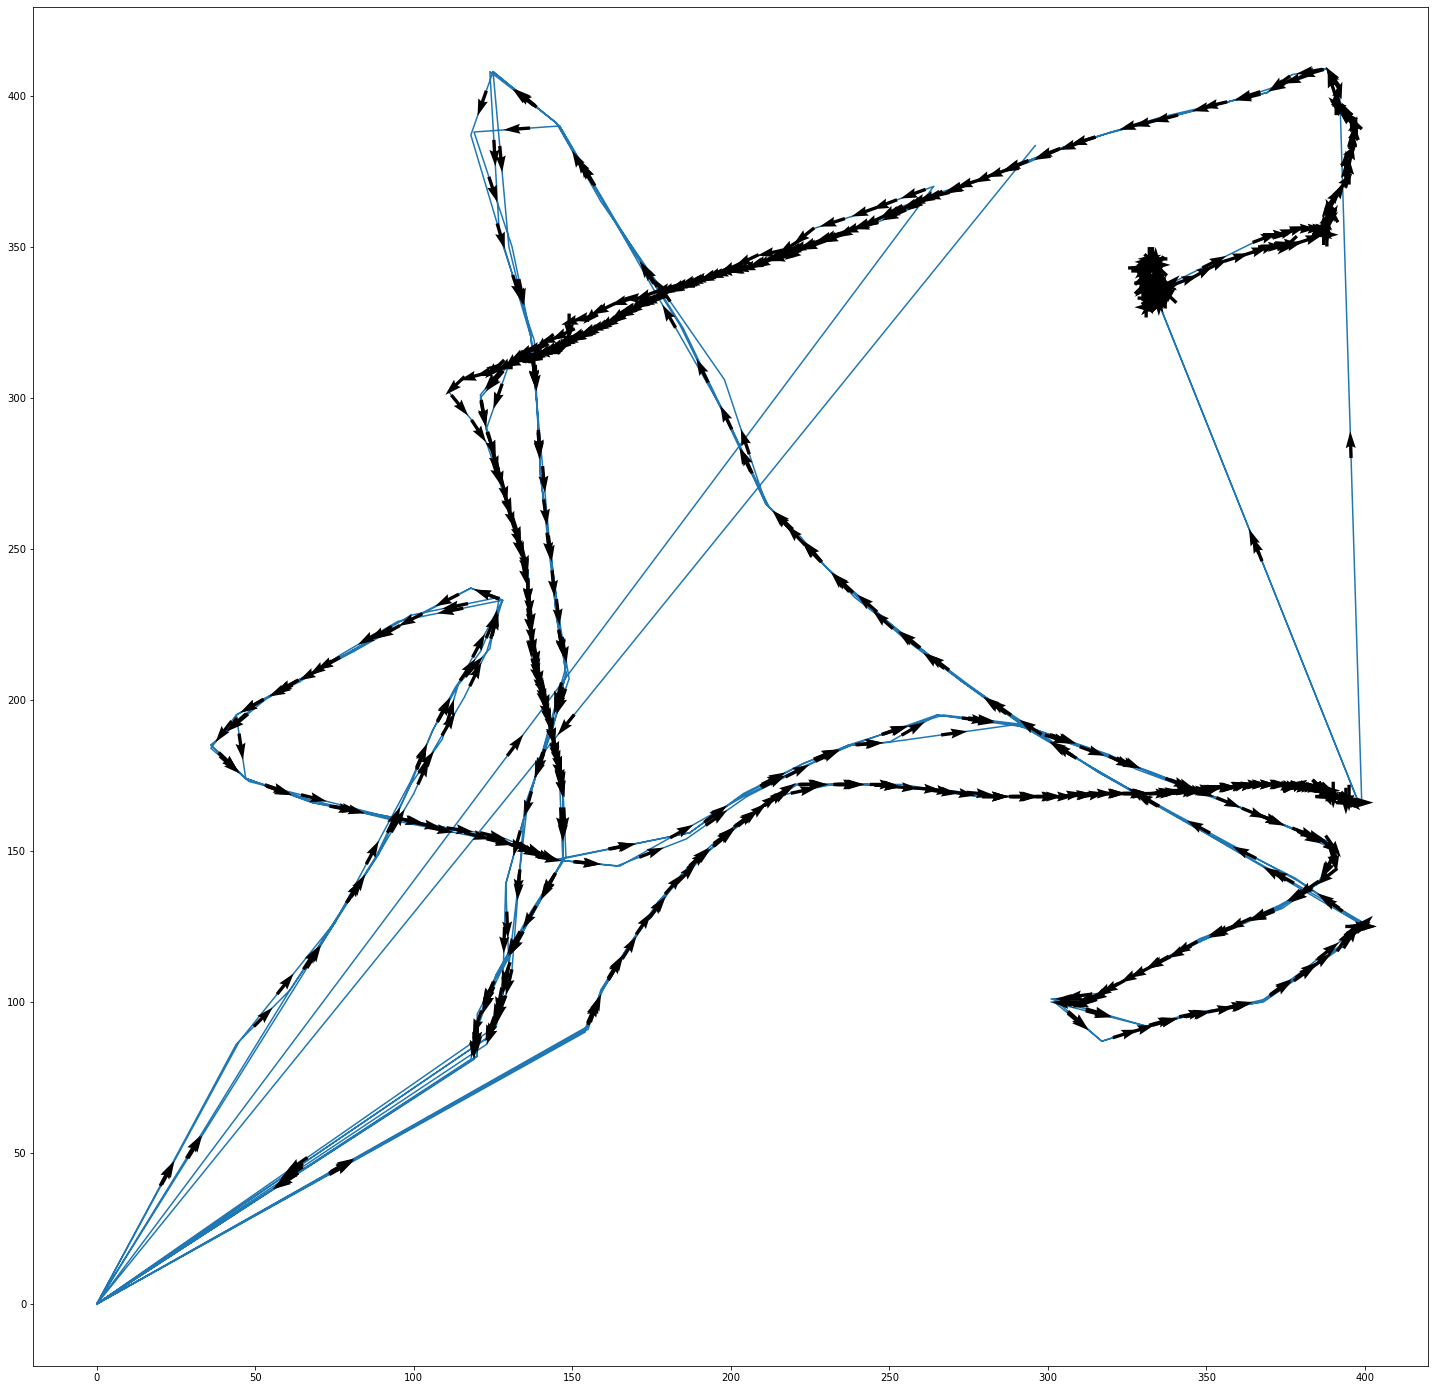

In [35]:
plt.rcParams['figure.figsize'] = [25, 25]
x = data_centroid['x'].values
y = data_centroid['y'].values

u = np.diff(x)
v = np.diff(y)
pos_x = x[:-1] + u/2
pos_y = y[:-1] + v/2
norm = np.sqrt(u**2+v**2) 

fig, ax = plt.subplots()
ax.plot(x,y, marker="o",markersize=.1)
ax.quiver(pos_x, pos_y, u/norm, v/norm, angles="xy", zorder=5, pivot="mid")
plt.show()

## Calculating fish velocity
A conversion was used, In one second we had 24 frames
Or 24fps

In [37]:
#turn the pandas dataframe into a list
xh=data_head['x'].tolist() 
yh=data_head['y'].tolist() 
xc=data_centroid['x'].tolist() 
yc=data_centroid['y'].tolist() 
xt=data_tail['x'].tolist() 
yt=data_tail['y'].tolist() 
#timeframe data
frameRaw=data_centroid['time'].tolist()

In [38]:
velocity=[]
for i in range(len(xc)-1):
    dx=xc[i] - xc[i+1]
    dy=yc[i] - yc[i+1]
    ds=dx*dx+dy*dy
    dv=math.sqrt(ds)*24
    velocity.append(dv)
velocity.append(0)
velocity[0]=0

Plotting velocity vs time

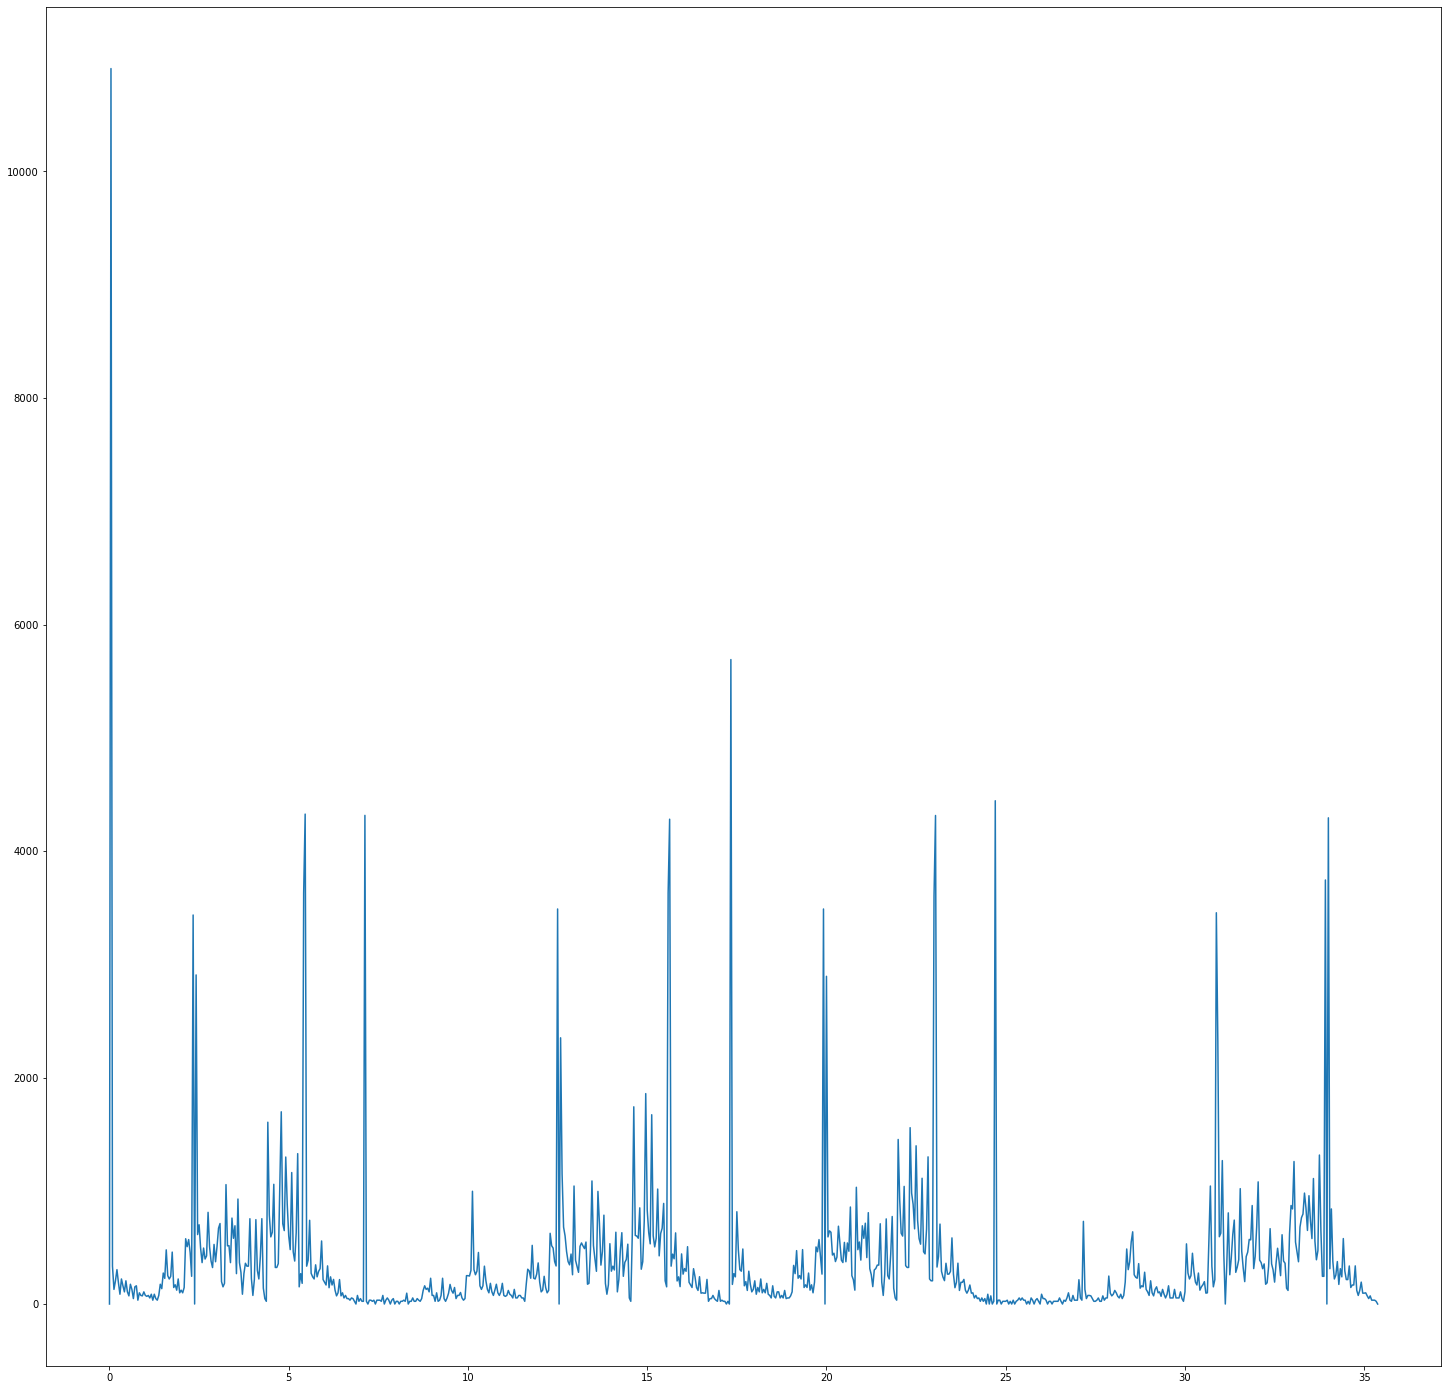

In [40]:
plt.rcParams['figure.figsize'] = [25, 25]

time = [x / 24 for x in frameRaw]

pyl.plot(time, velocity)

Calculating distance calculated

In [41]:
avg_dis=[]
ds=0
for i in range(len(velocity)):
    ds=velocity[i]+ds
    avg_dis.append(ds)

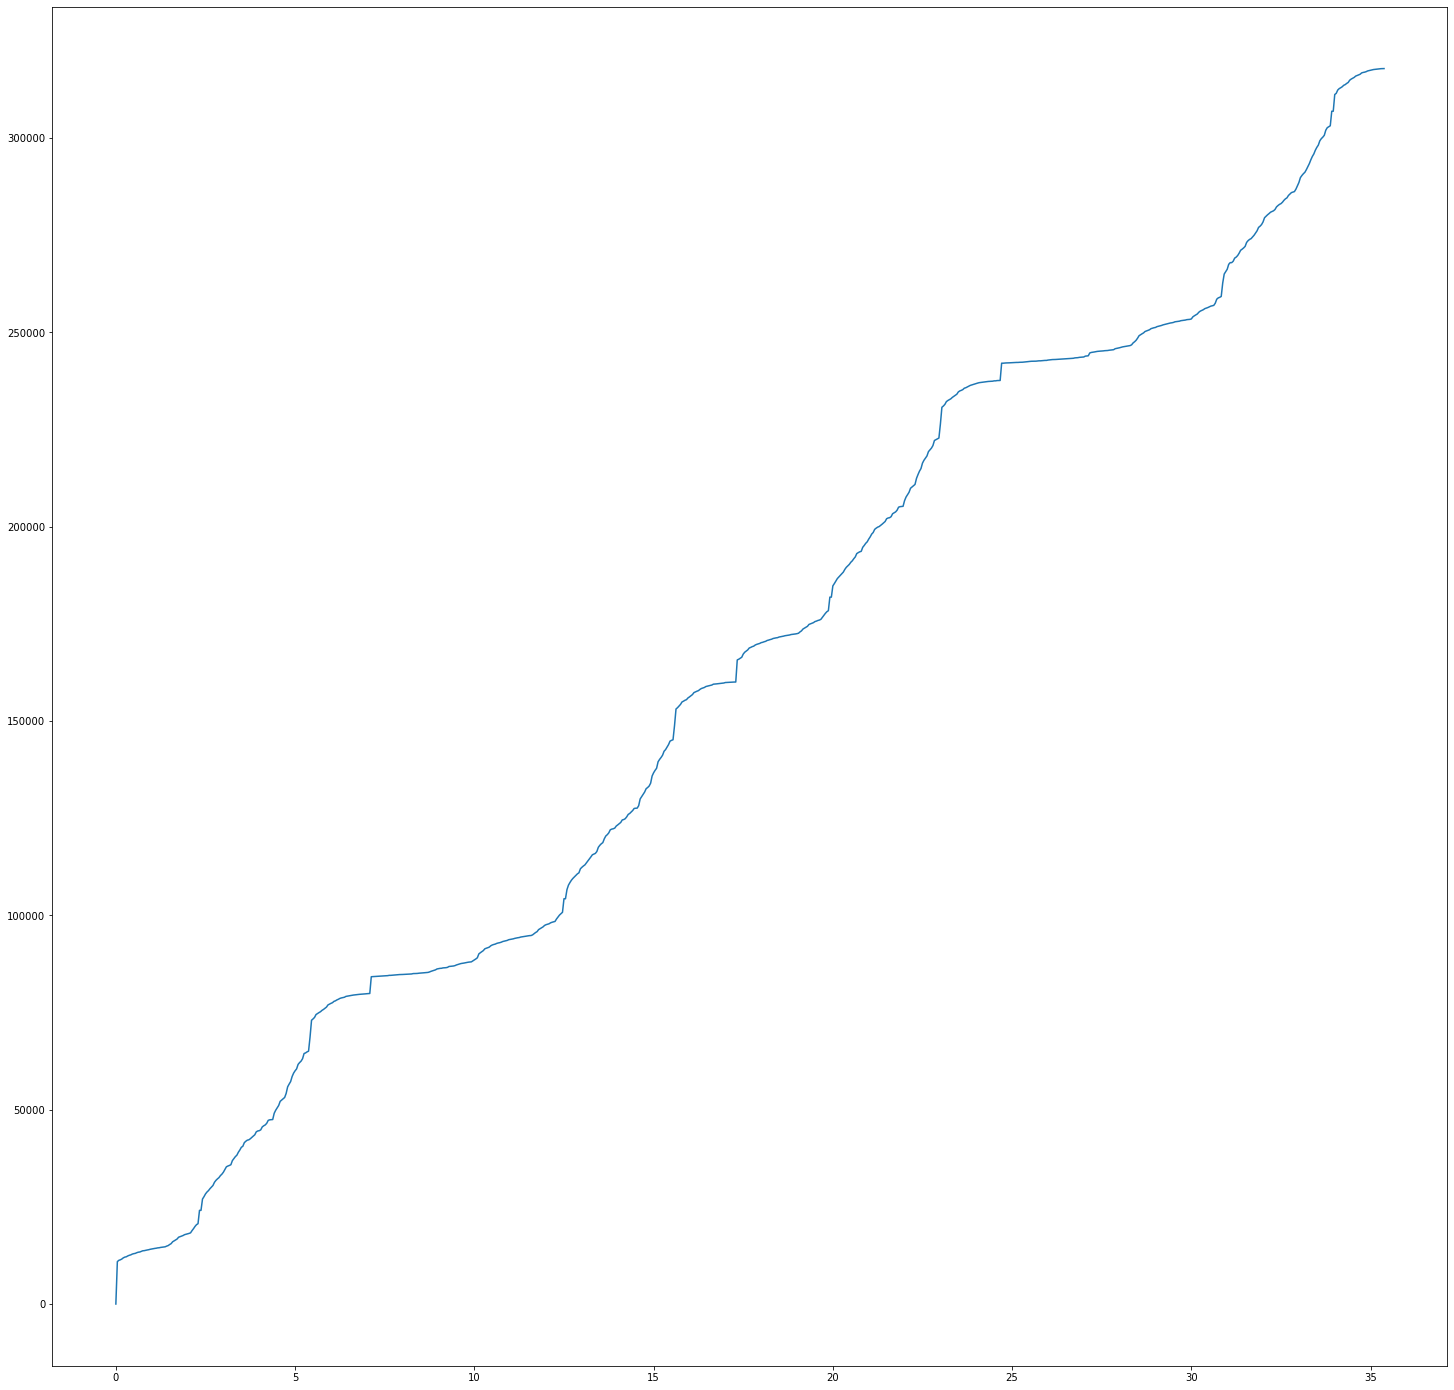

In [42]:
pyl.plot(time, avg_dis)

In [44]:
angle=[]
for i in range(1,len(xc)):
    dx=xh[i] - xc[i]
    dy=yh[i] - yc[i]
    arg=math.atan2(dy,dx)
    arg_deg=arg*180/3.1416
    angle.append(arg_deg)
angle.append(0)


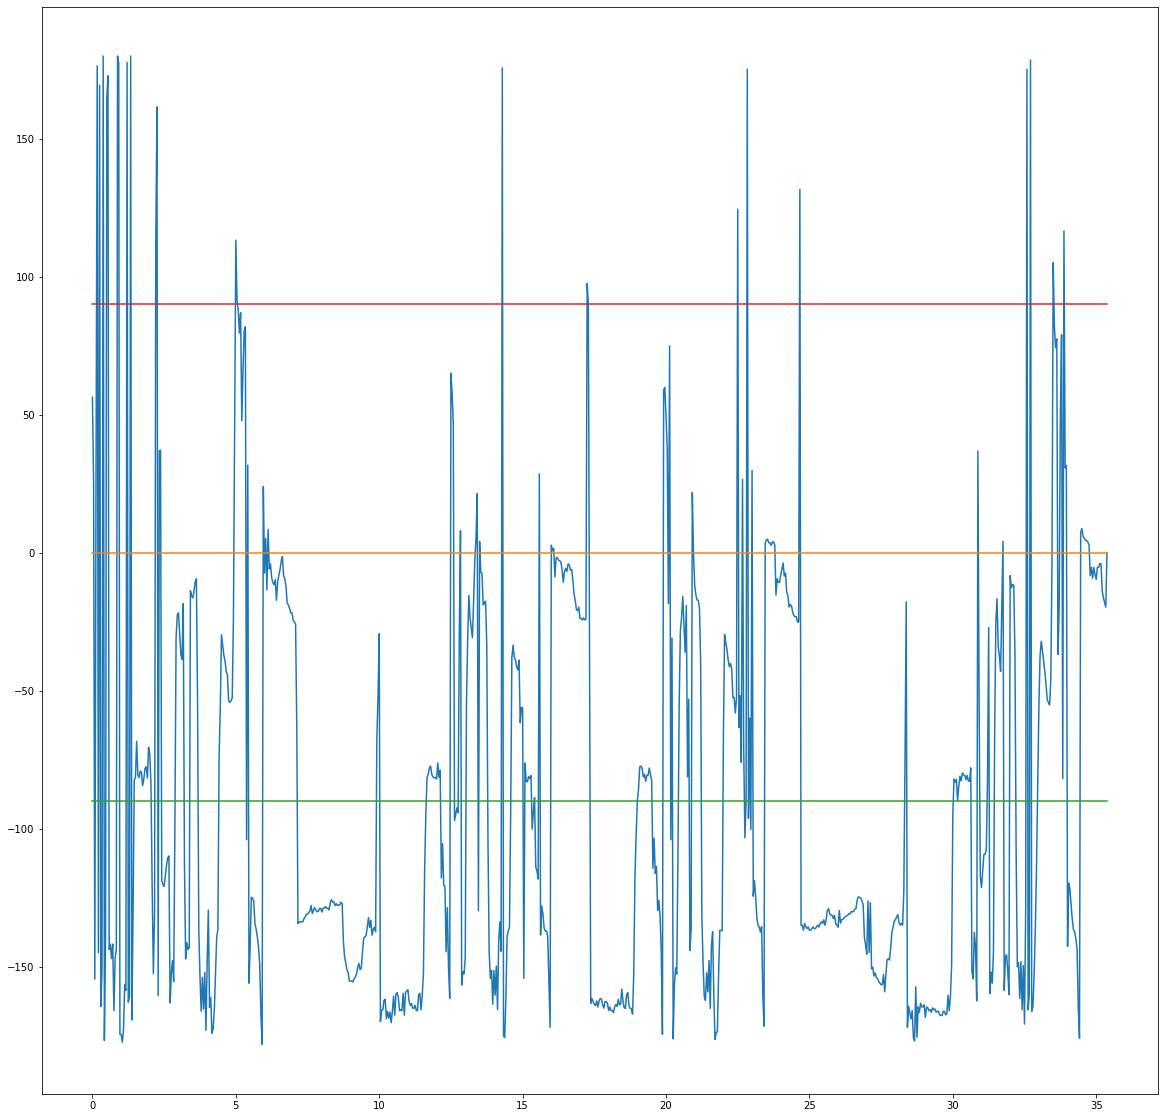

In [46]:
plt.rcParams['figure.figsize'] = [20, 20]
pyl.plot(time, angle)
y=np.ones(850)*90
y0=np.zeros(850)
y1=np.ones(850)*-90
pyl.plot(time, y0)
pyl.plot(time, y1)
pyl.plot(time, y)

Tail wave and frequency

In [47]:
tail_wv=[]
amp=0
for i in range (len(xh)):
    a=yh[i]-yc[i]
    b=xc[i]-xh[i]
    c=xh[i]*yc[i]-yh[i]*xc[i]
    den=math.sqrt(a*a+b*b)
    num=a*xt[i]+b*yt[i]+c
    val=num/den
    if(abs(val)>amp):
        amp=abs(val)
    tail_wv.append(val)

In [48]:
fish_wv=[]
amp1=0
for i in range (len(xh)):
    a=yh[i]-yt[i]
    b=xt[i]-xh[i]
    c=xh[i]*yt[i]-yh[i]*xt[i]
    den=math.sqrt(a*a+b*b)
    num=a*xc[i]+b*yc[i]+c
    val=num/den
    if(abs(val)>amp1):
        amp1=abs(val)
    fish_wv.append(val)

In [49]:
for i in range(len(fish_wv)):
    if(abs(fish_wv[i])>200):
        fish_wv[i]=fish_wv[i]/amp1+fish_wv[i-1]/2+fish_wv[i+1]/2

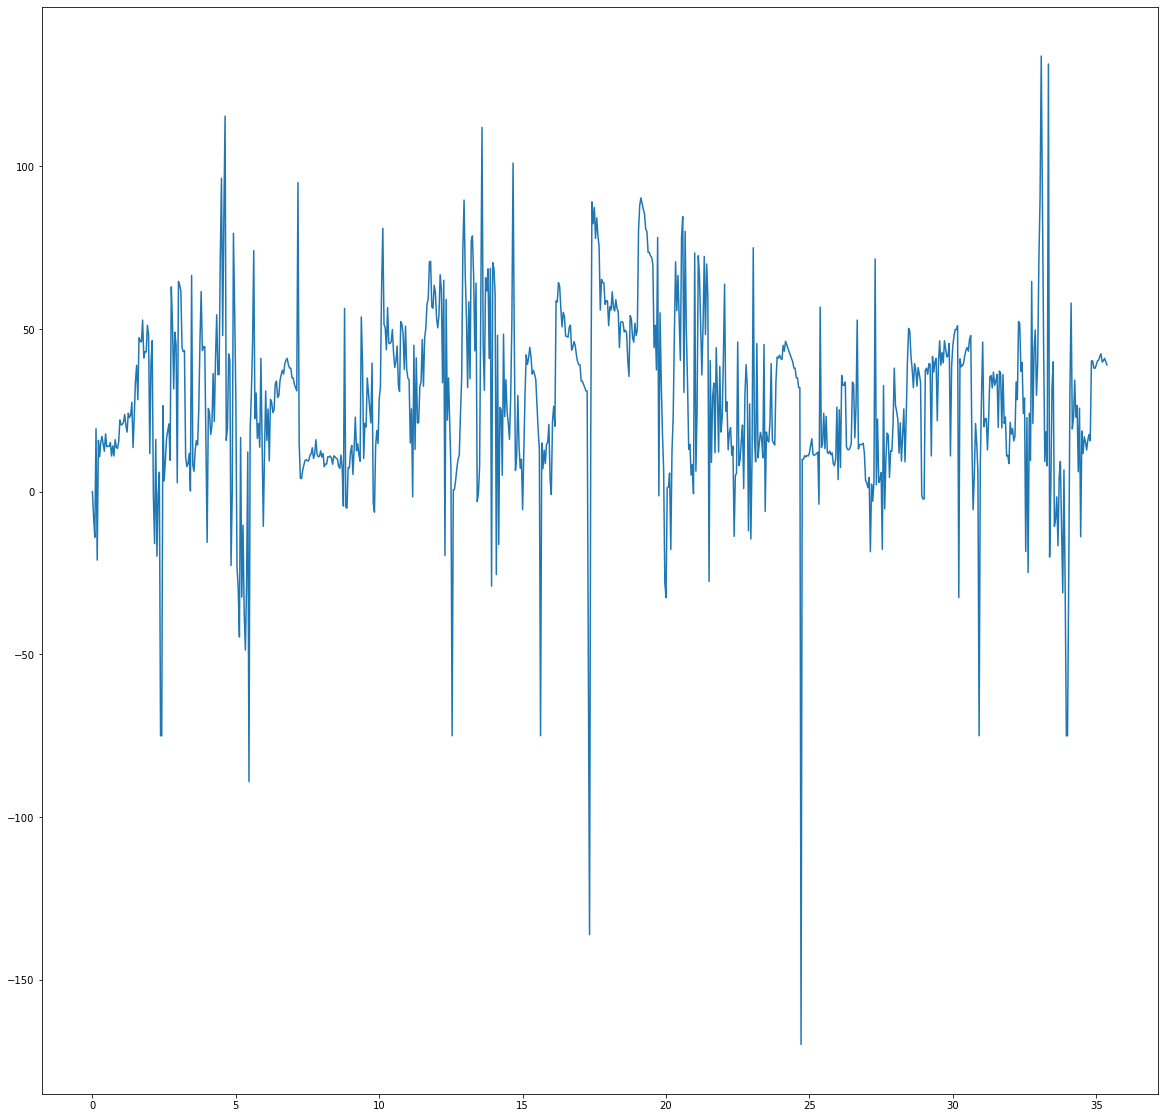

In [50]:
pyl.plot(time, fish_wv)

In [51]:
tail_velocity=[]
for i in range(len(tail_wv)):
    tail_velocity.append(tail_wv[i]*24)

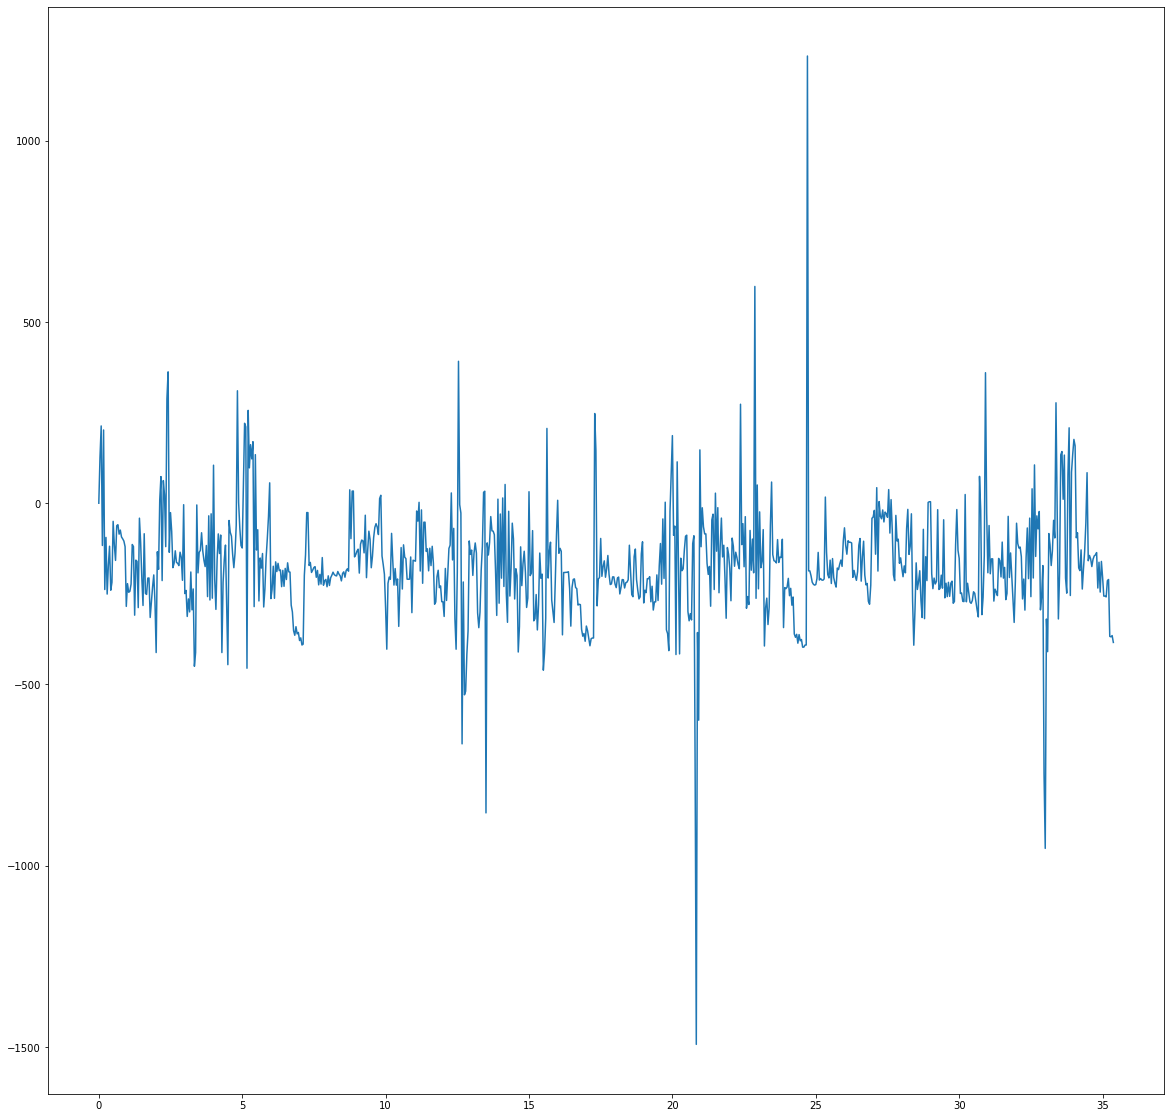

In [52]:
pyl.plot(time, tail_velocity)

In [53]:
avg=0
for i in range(len(tail_velocity)):
    avg=abs(tail_velocity[i])+avg
    
avg_tail=avg/len(tail_velocity)

In [54]:
avg_tail

193.6364778823896

In [55]:
tail_wave=[]
for i in range(len(tail_wv)):
    tail_wave.append(tail_wv[i]/amp)

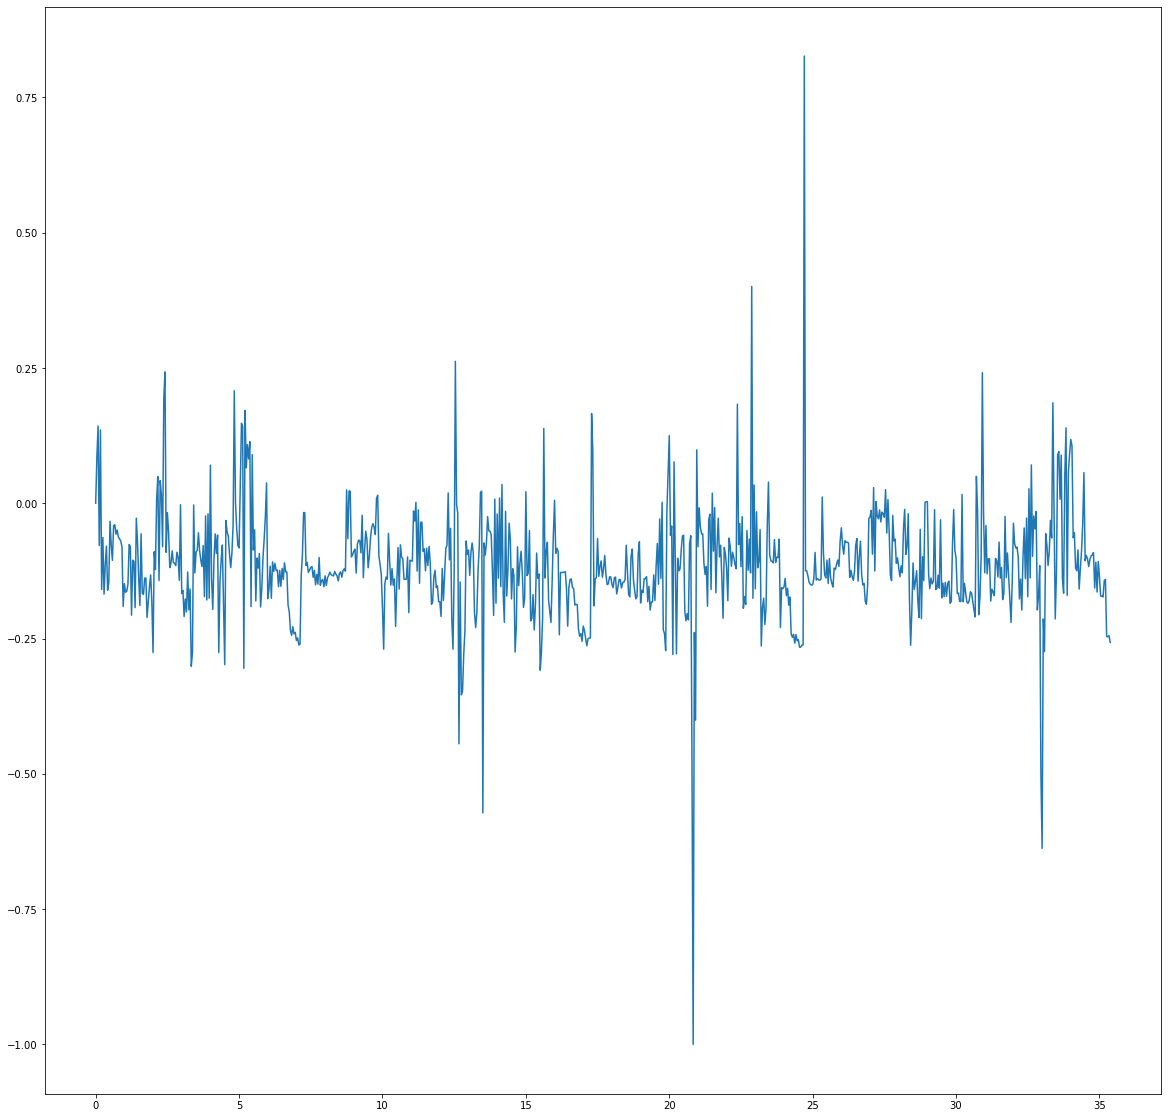

In [56]:
pyl.plot(time, tail_wave)

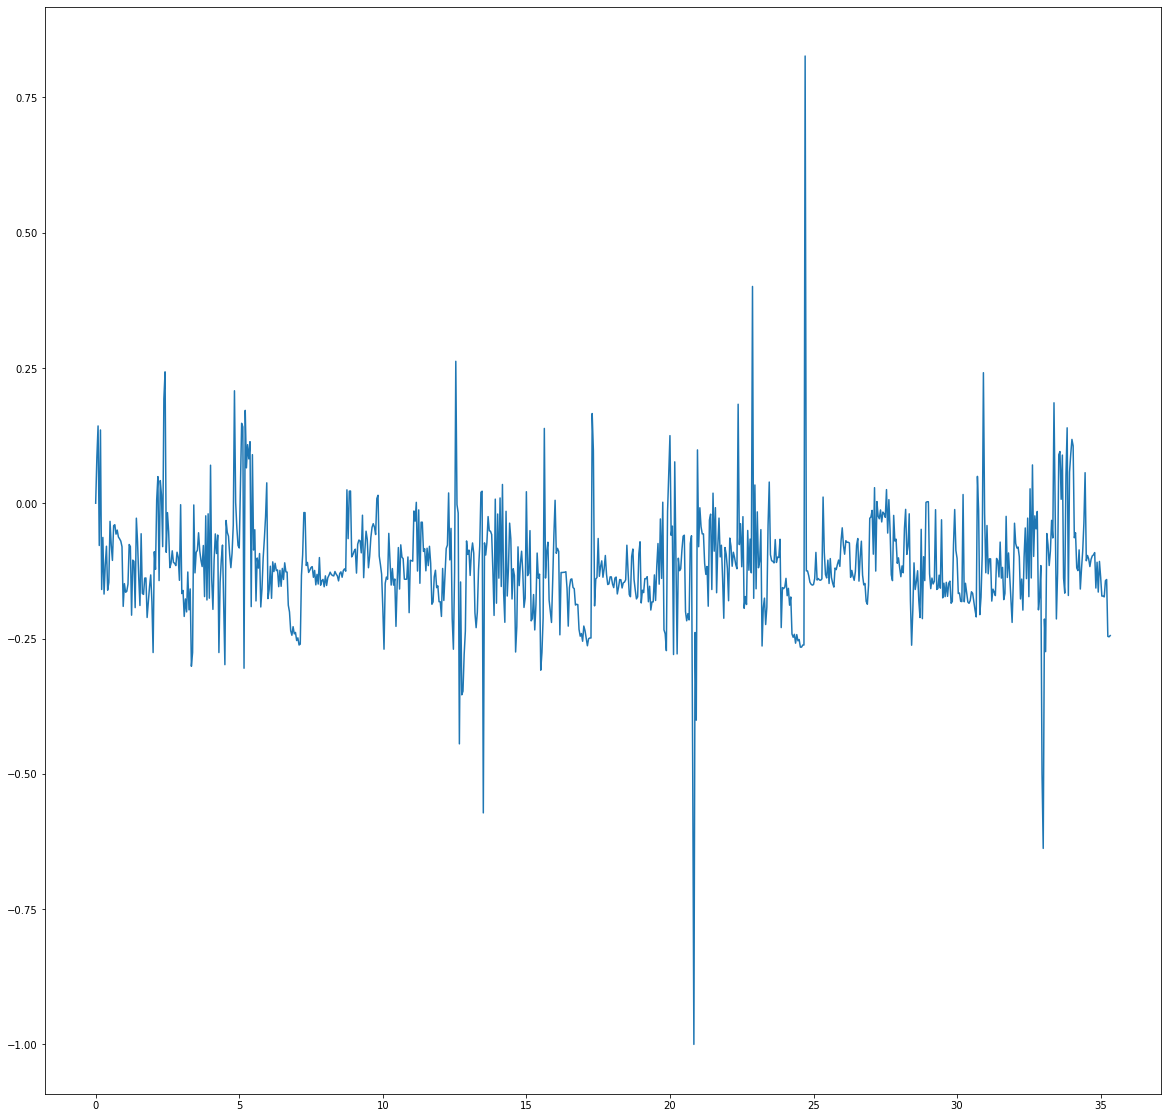

In [57]:
"""
Trim the array around the valid signal
"""
yTrimmed=tail_wave[0:849] #keeps only wanted portion of data (i.e. frame range with a good signal)
xTrimmed=time[0:849]
pyl.plot(xTrimmed, yTrimmed)


<ipython-input-58-f5c8d1f21f31>:5: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  xPolyFit = sy.linspace(0, length*0.002, num=length)


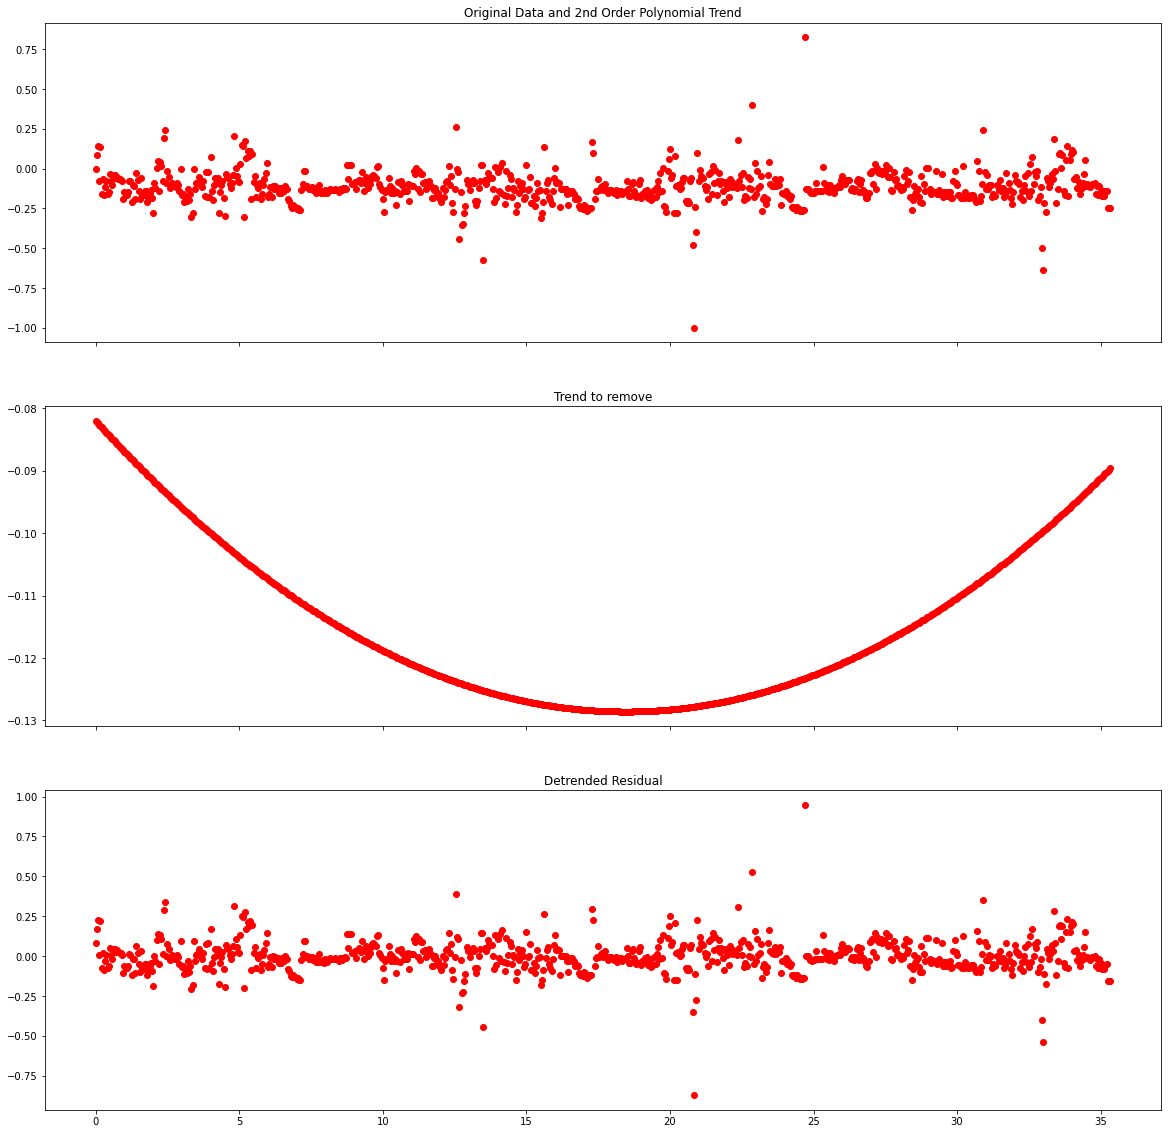

In [58]:

"""
Detrend the signal - use only if needed
"""
length=len(yTrimmed)
xPolyFit = sy.linspace(0, length*0.002, num=length)

model=np.polyfit(xPolyFit,yTrimmed,2) #fits second order polynomial 
predicted = np.polyval(model, xPolyFit) #creates points using fitted polynomial
yDetrended = yTrimmed-predicted
#plot the original, trend to remove and detrended data
fig, axes = plt.subplots(nrows=3, sharex=True)
axes[0].plot(xTrimmed, yTrimmed, 'ro')
axes[0].set(title='Original Data and 2nd Order Polynomial Trend')

axes[1].plot(xTrimmed, predicted, 'ro')
axes[1].set(title='Trend to remove')

axes[2].plot(xTrimmed, yDetrended, 'ro')
axes[2].set(title='Detrended Residual')

plt.show()


(array([5.01227270e-05, 1.01330787e-04, 1.04115921e-04, 1.07441001e-04,
        1.10051201e-04, 1.11153071e-04, 1.10601149e-04, 1.08656182e-04,
        1.05560825e-04, 1.01295764e-04, 9.57233788e-05, 8.90097251e-05,
        8.19709557e-05, 7.60025853e-05, 7.25223117e-05, 7.22058778e-05,
        7.44793174e-05, 7.76180435e-05, 7.94587759e-05, 7.83687946e-05,
        7.39607676e-05, 6.71826383e-05, 5.97627509e-05, 5.33416473e-05,
        4.87707022e-05, 4.59260349e-05, 4.40650083e-05, 4.24439442e-05,
        4.08039341e-05, 3.94663320e-05, 3.90489676e-05, 4.00314959e-05,
        4.24367155e-05, 4.57679480e-05, 4.91722598e-05, 5.17048929e-05,
        5.25810441e-05, 5.13599518e-05, 4.80453239e-05, 4.30914110e-05,
        3.73089102e-05, 3.16939359e-05, 2.72366449e-05, 2.47646406e-05,
        2.48345945e-05, 2.76466053e-05, 3.29658726e-05, 4.00884839e-05,
        4.79214505e-05, 5.52082529e-05, 6.08365566e-05, 6.40944450e-05,
        6.47645813e-05, 6.30502522e-05, 5.94266284e-05, 5.452280

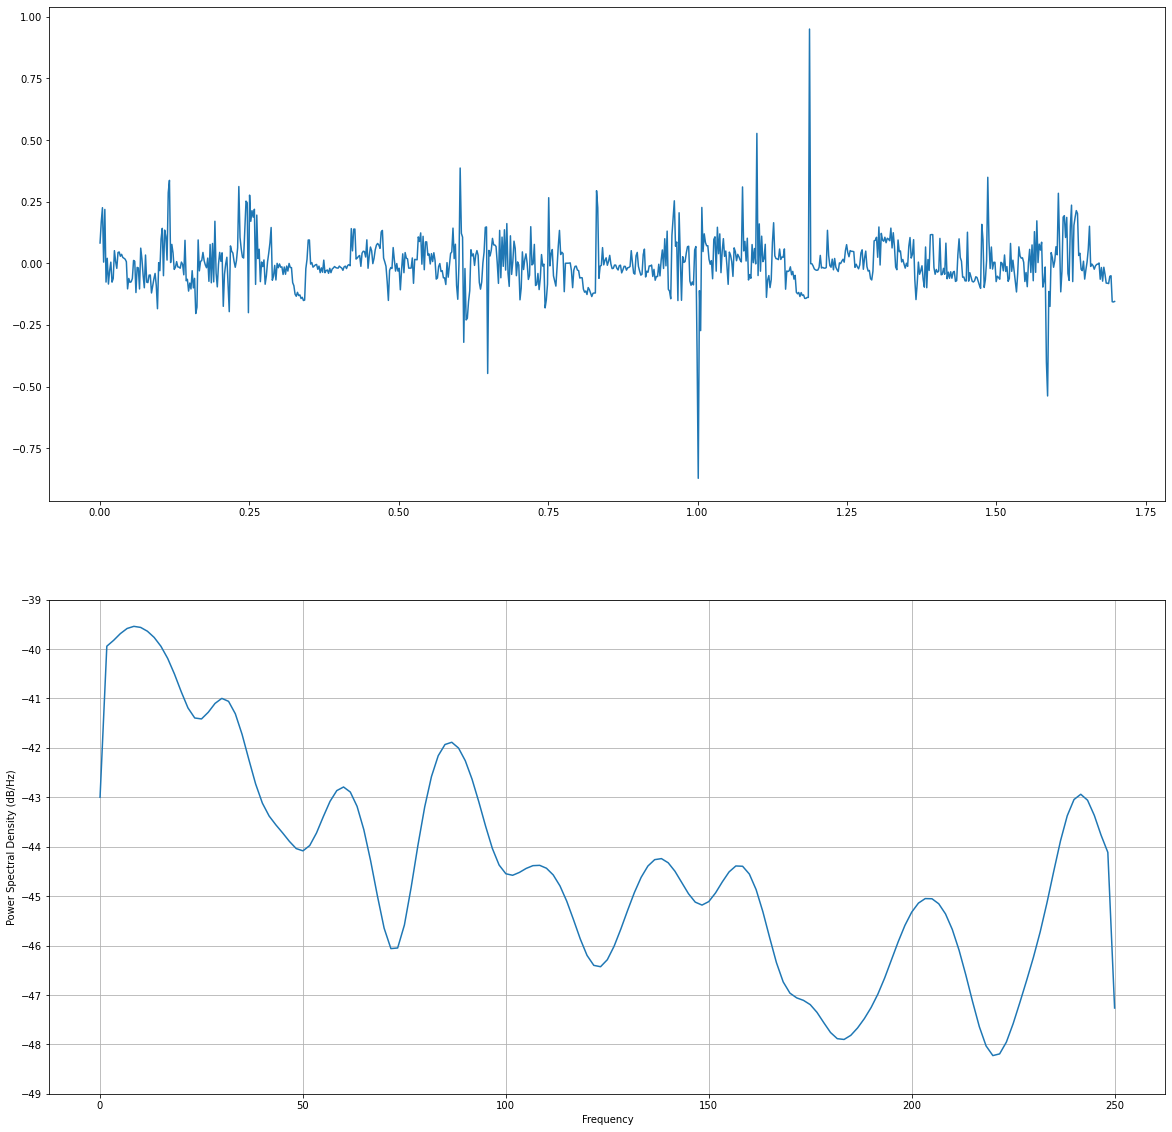

In [64]:

"""
Take and plot the power spectral density
"""
#choose one or the other
y=yTrimmed
y=yDetrended

pyl.subplot(211)
pyl.plot(xPolyFit, y)
pyl.subplot(212)
plt.psd(y, NFFT=64, Fs=500, noverlap=0,pad_to=300)

In [61]:
1/24*1000

41.666666666666664